# Atmospheric Data Analysis Suite

In [152]:
# IMPORTS
%matplotlib inline
import numpy as np
from IPython.display import display
from ipywidgets import widgets
from IPython.html.widgets import *
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import *
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
sns.set_context("poster")
import numpy as np
import pprint as pp
import scipy.stats as stats

In [153]:
# HELPER FUNCTIONS
def clean_string(s):
    return s.replace(" ", "")


### SELECT DATAFRAMES

If the csv file with your data is not in this folder, please include the path to the correct folder. 
'/Doucments/data/mydata.csv'


In [154]:
df_dict = {}
datasets = []
for filename  in os.listdir('data'): 
    if ".csv" in filename: 
        datasets.append('data/' + filename)

print(datasets)

['data/CR1000_test1.csv', 'data/Kwadela2014-winter.csv', 'data/CR1000_test2.csv', 'data/Kwadela2013-winter.csv', 'data/CRDateTest2.csv']


In [155]:
df1Filename = widgets.Dropdown(
    options= datasets,
    description='.CSV File: ',
    value= 'data/Kwadela2013-winter.csv',
)
df1Filename

In [156]:
df2Filename = widgets.Dropdown(
    options= datasets,
    description='.CSV File: ',
    value= 'data/Kwadela2014-winter.csv',
)
df2Filename

In [157]:
dataframe1 = pd.read_csv(df1Filename.value)
dataframe2 = pd.read_csv(df2Filename.value)
df_merged = pd.concat([dataframe1,dataframe2])


In [158]:
dataframe1_name = widgets.Text(
    description='Dataframe 1 name:',
    value= 'Dataframe1',
)

dataframe1_name

In [159]:
dataframe2_name = widgets.Text(
    description='Dataframe 2 name:',
    value= 'Dataframe2',
)
dataframe2_name

### SELECT FEATURES
Choose the columns from dataframe 1 that you would like to analyze.
Check boxes to the right of the column you wish to select.

In [160]:
default_select = ['Date', 'Hour', 'Minute', 'Second', 'Year', 'Dusttraks_(mg/m3)','PM10_(ug/m3)','PM2.5_(ug/m3)','SO2_(ppb)',
              'CO_(ppm)','NO_(ppb)','NO2_(ppb)','Hour', 'Minute','Day','Month',
              'Year','Temperature_(degC)','Wind_Speed_(m/s)']
kitchen_list = [column for column in dataframe1 if '-K' in column] #KwaDela

In [161]:
cb_cont = widgets.HBox(width='100%')
cb_cont.overflow_x = 'scroll'
checkboxes = []
for column in dataframe1:
    if column in dataframe2:
        if column in default_select:
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=True, width=50))
        elif column in kitchen_list: #To be removed: KwaDela specific
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=True, width=50))
        else:
            checkboxes.append(\
                 widgets.Checkbox(description = clean_string('%s') %(column), \
                             value=False, width=50))
cb_cont.children=[i for i in checkboxes]
display(cb_cont)




In [162]:
df1_columns = []
for checkbox in cb_cont.children:
    if checkbox.value:
        df1_columns.append(checkbox.description)
        print checkbox.description
dataframe1 = dataframe1[df1_columns]

Date
Wind_Speed_(m/s)
Temperature_(degC)
SO2_(ppb)
NO_(ppb)
NO2_(ppb)
PM10_(ug/m3)
PM2.5_(ug/m3)
CO_(ppm)
H01-K-E
H02-K-N
H03-K-S
H04-K-S
H05-K-N
H06-K-N
H07-K-S
H10-K-N
Dusttraks_(mg/m3)


In [163]:
# AUTOMATICALLY SELECTS BOXES THAT APPEAR IN BOTH DATAFRAMES AND WERE CHOSEN FOR DATAFRAME 1.
checkboxes = []
for column in dataframe2:
    if column in df1_columns:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=True, width=50))
    elif column in default_select:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=True, width=50))
    else:
        checkboxes.append(\
             widgets.Checkbox(description = clean_string('%s') %(column), \
                         value=False, width=50))
cb_cont.children=[i for i in checkboxes]
display(cb_cont)



In [164]:
df2_columns = []
for checkbox in cb_cont.children:
    if checkbox.value:
        df2_columns.append(checkbox.description)
        print checkbox.description
        
dataframe2 = dataframe2[df2_columns]

Date
Hour
Minute
Second
Day
Month
Year
Wind_Speed_(m/s)
Temperature_(degC)
SO2_(ppb)
NO_(ppb)
NO2_(ppb)
PM10_(ug/m3)
PM2.5_(ug/m3)
CO_(ppm)
H01-K-E
H02-K-N
H03-K-S
H04-K-S
H05-K-N
H06-K-N
H07-K-S
H10-K-N
Dusttraks_(mg/m3)


### DATAFRAME 1

In [165]:
dataframe1.head()

,Date,Wind_Speed_(m/s),Temperature_(degC),SO2_(ppb),NO_(ppb),NO2_(ppb),PM10_(ug/m3),PM2.5_(ug/m3),CO_(ppm),H01-K-E,H02-K-N,H03-K-S,H04-K-S,H05-K-N,H06-K-N,H07-K-S,H10-K-N,Dusttraks_(mg/m3)
0,7/2/13 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/2/13 12:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/2/13 12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/2/13 12:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/2/13 12:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATAFRAME 2

In [166]:
dataframe2.head()

,Date,Hour,Minute,Second,Day,Month,Year,Wind_Speed_(m/s),Temperature_(degC),SO2_(ppb),...,CO_(ppm),H01-K-E,H02-K-N,H03-K-S,H04-K-S,H05-K-N,H06-K-N,H07-K-S,H10-K-N,Dusttraks_(mg/m3)
0,7/11/14 12:00,12,0,0,11,7,2014,4.458,11.910,NaN,...,0.193,22.3,15.4,13.1,13.8,15.4,11.7,15.3,17.1,0.043
1,7/11/14 12:01,12,1,0,11,7,2014,4.887,11.944,NaN,...,0.163,22.9,15.3,13.1,13.8,15.4,11.7,15.4,17.2,0.041
2,7/11/14 12:02,12,2,0,11,7,2014,2.988,11.860,NaN,...,0.188,23.5,15.3,13.0,13.8,15.5,11.8,15.4,17.3,0.042
3,7/11/14 12:03,12,3,0,11,7,2014,5.413,12.028,NaN,...,0.206,24.1,15.2,13.1,13.7,15.5,11.8,15.5,17.4,0.044
4,7/11/14 12:04,12,4,0,11,7,2014,6.788,12.310,NaN,...,0.240,24.7,15.2,13.1,13.7,15.5,11.8,15.5,17.5,0.043


### SOME HELPER FUNCTIONS TO BE USED IN ANALYSIS

In [167]:
def get_datetime(s):
    try:
        dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    except ValueError:
        try:            
            dt = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")
        except ValueError:
                raise ValueError('Date must be in "%m/%d/%y %H:%M" or "%m/%d/%y %H:%M:%S" format')
    return dt
      

def days_since_start(df):
    """get time since epoch using a series for month and day
    takes in dataframe and returns the dataframe with an added column
    for days since the beginning of data collection"""
    
    day_array = np.array(df.Day)
    month_array = np.array(df.Month)
    year_array = np.array(df.Year)
    first_month = df['Month'].min()
    running_days = []
    for day, month in zip(day_array, month_array):
        total_days = (month - first_month) * 31
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        running_days.append(total_days)
    df['DayCount'] = pd.Series(running_days, index = df.index)
    return df


#Daily Averages

#average_vals_columns = ['DailyAvgTemp', 'DailyAvgPM4', 'DailyAvgWind', 'DailyAvgPM10', 'DailyAvgPM2.5']

def compute_avg_vals(df):
    """computes average values of each day in a dataframe
    must apply to a groupby object where df is grouped by days
    returns a dataframe with several new, added columns """
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    time_columns = ['Hour', 'Day', 'Month', 'Year', 'DayCount', 'Date']
    for column in df.columns:
        if df[column].dtype in numerics and column not in time_columns:
            if column + '_Daily_Avg' not in df.columns:
                df[column + '_Daily_Avg'] = df[column].mean()
    return df

def compute_avg_house13(df):
    """tailored to compute the average indoor house temperature of 2013"""
    df['AvgHouse'] = (df['H01-K-E']+ df['H02-K-N']+ df['H03-K-S']+ df['H04-K-S']
                      + df['H05-K-N']+df['H06-K-N'] + df['H10-K-N']
                      +df['H11-K-X']+ df['H12-K-N'] + df['H15-K-S'] +df['H17-K-N'] 
                      + df['H18-K-S'] + df['H20-K-S']
                      )/13
    return df

def compute_avg_house14(df):
    """tailored to compute the avg indoor house temp for 2014"""
    df['AvgHouse'] = (df['H01-K-E']+ df['H02-K-N']+ df['H03-K-S']+ df['H04-K-S']
                      + df['H05-K-N']+df['H06-K-N'] + df['H10-K-N']
                      +df['H11-K-N'] + df['H15-K-N']+df['H16-K-N'] +df['H17-K-S'] 
                      + df['H18-K-N']+df['H19-K-W'] + df['H22-K-S']
                      )/14
    return df

def temp_difference(df):
    """computes a column of the difference in indoor and outdoor temperature, AvgHouse and Temperature_(degC)
    df: any given dataframe
    returns a dataframe with a new column"""
    df['temp_difference'] = df['AvgHouse']-df['Temperature_(degC)']
    return df


def abcde_time_dataframes(df):
    """splits a dataframe into a series of times for differently characterized burning periods of the day
    df: timeseries dataframe to be split into specified time ranges
    returns: 4 different dataframes for early morning, breakfast, afternoon, dinner, and evening times
    """
    #DATAFRAMES FOR GIVEN TIME RANGES
    dfA = df[df['Hour'] < 5]
    dfB = df[df['Hour'] > 4]
    dfB = dfB[dfB['Hour'] <= 9]
    dfC = df[df['Hour'] >9]
    dfC = dfC[dfC['Hour'] <= 14]
    dfD = df[df['Hour'] >14]
    dfD = dfD[dfD['Hour'] <= 21]
    dfE = df[df['Hour'] > 21]
    res = [dfA, dfB, dfC, dfD, dfE]
    return res


#GENERAL FUNCTION FOR DIURNAL DATA

def get_mean_feature_for_hour(hourdf, feature):
    """hourdf: dataframe specific to one hour of data
    feature: given header to be explored (temperature, PMx, etc)
    returns: dataframe with a new mean feature per hour"""
    
    res = hourdf[feature].mean()
    return res

def feature_diurnal_data(df, feature):
    """breaks down a given dataframe by feature into one dataframe per hour (24) for plotting of a dirunal profile
    df: dataframe to be broken down
    feature: header to be broken down"""
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = get_mean_feature_for_hour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= get_mean_feature_for_hour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = get_mean_feature_for_hour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = get_mean_feature_for_hour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = get_mean_feature_for_hour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = get_mean_feature_for_hour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = get_mean_feature_for_hour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = get_mean_feature_for_hour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = get_mean_feature_for_hour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = get_mean_feature_for_hour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = get_mean_feature_for_hour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = get_mean_feature_for_hour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = get_mean_feature_for_hour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = get_mean_feature_for_hour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = get_mean_feature_for_hour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = get_mean_feature_for_hour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = get_mean_feature_for_hour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = get_mean_feature_for_hour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = get_mean_feature_for_hour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = get_mean_feature_for_hour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = get_mean_feature_for_hour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = get_mean_feature_for_hour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = get_mean_feature_for_hour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = get_mean_feature_for_hour(dfhour23, feature)

    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    return featlist

hour_list = range(0,24)

def preprocess(df):
    """get all mean features and recodes for plotting and stats analysis
    apply correction factor and unit tweaking where appropriate
    returns: a copy of the original df with added hour, day,month, year, daycount
    tempdifferent, and PM4 counts"""

    res = df.copy()
    if hasattr(res, 'Date'):
        res['Date'] = (res.Date.astype(str))       
        datetimes = res.Date.apply(get_datetime)
        res['Hour'] = datetimes.apply(lambda dt: dt.hour)
        res['Day'] = datetimes.apply(lambda dt: dt.day)
        res['Month'] = datetimes.apply(lambda dt: dt.month)
        res['Year'] = datetimes.apply(lambda dt: dt.year)
    res = days_since_start(res)
    if 'Dusttraks_(mg/m3)' in res.columns:
        dusttraks_correction_factor = 0.14
        res['Dusttraks_(mg/m3)'] = res['Dusttraks_(mg/m3)']*dusttraks_correction_factor
    if 'PM4_(ug/m3)' in res.columns:
        res['PM4_(ug/m3)']=res['Dusttraks_(mg/m3)']*1000
    grouped = res.groupby('DayCount')
    res = grouped.apply(compute_avg_vals)
    return res




### SOME DATAFRAME CLEANING

In [168]:
dataframe1 = preprocess(dataframe1)
dataframe2 = preprocess(dataframe2)

df_dict['dataframe1']=dataframe1
df_dict['dataframe2']=dataframe2

## COMPARING TWO DATASETS

CHOOSE VAL

In [169]:
df1_columns = [column for column in dataframe1]
df1_feature_x = widgets.Dropdown(
    options= df1_columns,
    value = 'DayCount',
    description='Choose x feature:'
)
display(df1_feature_x)

In [170]:
df1_columns = [column for column in dataframe1]
df1_feature_y = widgets.Dropdown(
    value = df1_columns[-1],
    options= df1_columns,
    description='Choose y feature:'
)
display(df1_feature_y)

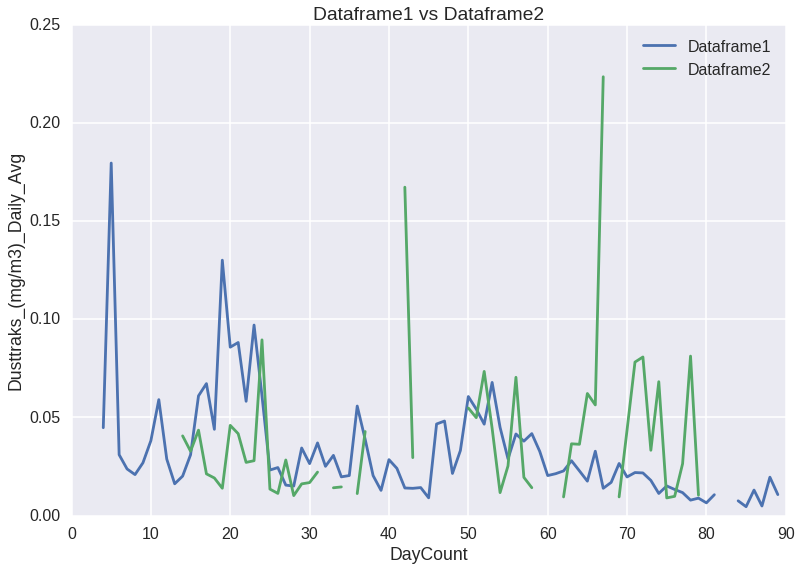

In [171]:
def plot_x_y_features(feature_x, feature_y, dataframe1_name, dataframe2_name):
    while(True):
        try:
            plt.plot(dataframe1[feature_x.value], dataframe1[feature_y.value])
            plt.plot(dataframe2[feature_x.value], dataframe2[feature_y.value])
            plt.xlabel(feature_x.value)
            plt.ylabel(feature_y.value)
            plt.legend([dataframe1_name.value, dataframe2_name.value])
            plt.title(dataframe1_name.value + ' vs ' + dataframe2_name.value)
            plt.show()
            break
        except:
            print "Cannont plot graph. Please try a different feature"
            return
plot_x_y_features(df1_feature_x, df1_feature_y, dataframe1_name, dataframe2_name)

## COMPARE TWO DATASETS DIURNAL

In [172]:
df1_columns = [column for column in dataframe1]
df_feature_diurnal = widgets.Dropdown(
    options= df1_columns,
    description='Choose feature:'
)
display(df_feature_diurnal)

In [173]:
def plot_diurnal(hour_list, dataframe1, dataframe2, df_feature_diurnal, dataframe1_name, dataframe2_name):
    while True:
         try:
            plt.plot(hour_list, feature_diurnal_data(dataframe1, df_feature_diurnal.value))
            plt.plot(hour_list, feature_diurnal_data(dataframe2, df_feature_diurnal.value))
            plt.title('Diurnal profile of ' + df_feature_diurnal.value)
            plt.legend([dataframe1_name.value, dataframe2_name.value])
            plt.ylabel(df_feature_diurnal.value + ' (Needs units)')
            plt.xlabel('Hour of day')
            plt.show()
            break
         except TypeError:
            print "Cannont plot diurnal graph. Please try a different feature"
            return

plot_diurnal(hour_list, dataframe1, dataframe2, df_feature_diurnal, dataframe1_name, dataframe2_name)


Cannont plot diurnal graph. Please try a different feature


## Choose date/time range
Assuming sorted by date.

In [174]:
start_day = widgets.Text(
    description='Select day to mark start of time range',
    value= str(min(dataframe1['DayCount'])),
)
print 'Please enter a value between ' + str(min(dataframe1['DayCount'])) + ' and ' + str(max(dataframe1['DayCount'])-1)

start_day

Please enter a value between 2 and 88


In [175]:
start_day = int(start_day.value)

In [176]:
end_day = widgets.Text(
    description='Select day to mark end of time range',
    value= str(max(dataframe1['DayCount'])),
)
print 'Please enter a value between ' + str(min(dataframe1['DayCount'])+1) + ' and ' + str(max(dataframe1['DayCount']))

end_day

Please enter a value between 3 and 89


In [177]:
end_day = int(end_day.value)

In [178]:
df1_columns = [column for column in dataframe1]
df_feature_diurnal_day_range = widgets.Dropdown(
    options= df1_columns,
    description='Choose feature:'
)
display(df_feature_diurnal_day_range)

In [179]:
def plot_day_range_diurnal(feature, df1, df2, df1_name, df2_name, start_day, end_day):
    df1_time_range = df1[(df1['DayCount']) >= start_day]
    df1_time_range = df1_time_range[(df1_time_range['DayCount']) <= end_day]
    df_dict['df1_day_range'] = df1_time_range
    df2_time_range = df2[(df2['DayCount']) >= start_day]
    df2_time_range = df2_time_range[(df2_time_range['DayCount']) <= end_day]
    df_dict['df2_day_range'] = df2_time_range
    hourlist = range(0,24)
    while True:
        try:
            plt.plot(hourlist, feature_diurnal_data(df1_time_range, feature))
            plt.plot(hourlist, feature_diurnal_data(df2_time_range, feature))        
            plt.legend([df1_name, df2_name])
            plt.title(feature + ' Diurnal From Days ' + str(start_day) + ' to ' + str(end_day))
            plt.xlabel('Hour')
            plt.ylabel(feature)
            plt.show()
            break
        except TypeError:
            print('Could not plot desired graph. Please try selecting a different feature.')
            return

plot_day_range_diurnal(df_feature_diurnal_day_range.value,
                       dataframe1,
                       dataframe2,
                       dataframe1_name.value,
                       dataframe2_name.value,
                       start_day,
                       end_day)

Could not plot desired graph. Please try selecting a different feature.


### Interactive Day Range Selection

In [180]:
day_start_slider = IntSlider(min=min(dataframe1['DayCount']), max=max(dataframe1['DayCount']), step=1, value=2)
day_end_slider = IntSlider(min=min(dataframe1['DayCount']), max=max(dataframe1['DayCount']), step=1, value=max(dataframe1['DayCount']))
@interact(start_day_interactive = day_start_slider, end_day_interactive = day_end_slider)

def plot_interactive_day_range(start_day_interactive, end_day_interactive):
    print('Select day range to visualize.')
    plot_day_range_diurnal(df_feature_diurnal_day_range.value,
                       dataframe1,
                       dataframe2,
                       dataframe1_name.value,
                       dataframe2_name.value,
                       start_day_interactive,
                       end_day_interactive)

Select day range to visualize.
Could not plot desired graph. Please try selecting a different feature.


## Choose time of day/hour range.

Choose starting time: An integer between 0 and 24 corresponding to the hour of the day.

In [181]:
start_hour = widgets.Text(
    description='Starting time: an integer between 0 and 24 corresponding to the hour of the day.',
    value= '0',
)
start_hour

In [182]:
start_hour = int(start_hour.value)

In [183]:
end_hour = widgets.Text(
    description='End time: an integer between 0 and 24 corresponding to the hour of the day.',
    value= '23',
)
end_hour

In [184]:
end_hour = int(end_hour.value)

In [185]:
df1_columns = [column for column in dataframe1]
hour_range_feature_x = widgets.Dropdown(
    options= df1_columns,
    value = 'DayCount',
    description='Choose feature:'
)
display(hour_range_feature_x)

In [186]:
df1_columns = [column for column in dataframe1]
hour_range_feature_y = widgets.Dropdown(
    value= df1_columns[-1],
    options= df1_columns,
    description='Choose feature:'
)
display(hour_range_feature_y)

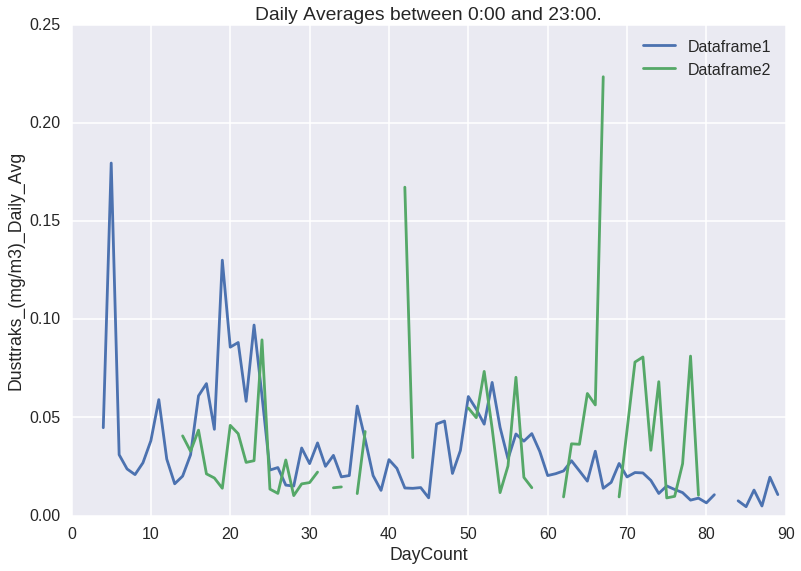

In [187]:
def plot_hour_range(feature_x, feature_y, df1, df2, start_hour, end_hour, df1_name, df2_name):
    df1_time_range = df1[(df1['Hour']) >= start_hour]
    df1_time_range = df1_time_range[(df1_time_range['Hour']) <= end_hour]
    df2_time_range = df2[(df2['Hour']) >= start_hour]
    df2_time_range = df2_time_range[(df2_time_range['Hour']) <= end_hour]
    grouped = df1_time_range.groupby('DayCount')
    df1_time_range = grouped.apply(compute_avg_vals)
    df_dict['df1_hour_range'] = df1_time_range
    grouped = df2_time_range.groupby('DayCount')
    df2_time_range = grouped.apply(compute_avg_vals)
    df_dict['df2_hour_range'] = df2_time_range
    
    while(True):
        try:
            plt.plot(df1_time_range[feature_x.value], df1_time_range[feature_y.value])
            plt.plot(df2_time_range[feature_x.value], df2_time_range[feature_y.value])
            plt.xlabel(feature_x.value)
            plt.ylabel(feature_y.value)
            plt.legend([df1_name.value, df2_name.value])
            plt.title('Daily Averages between ' + str(start_hour) + ':00 and ' + str(end_hour) + ':00.')
            plt.show()
            break
        except:
            print "Cannont plot graph. Please try a different feature"
            return

plot_hour_range(hour_range_feature_x,
                       hour_range_feature_y,
                       dataframe1,
                       dataframe2,
                       start_hour,
                       end_hour,
                       dataframe1_name,
                       dataframe2_name)


### Interactive Time of Day Range Selection

Select values for time of day range cutoff hours.


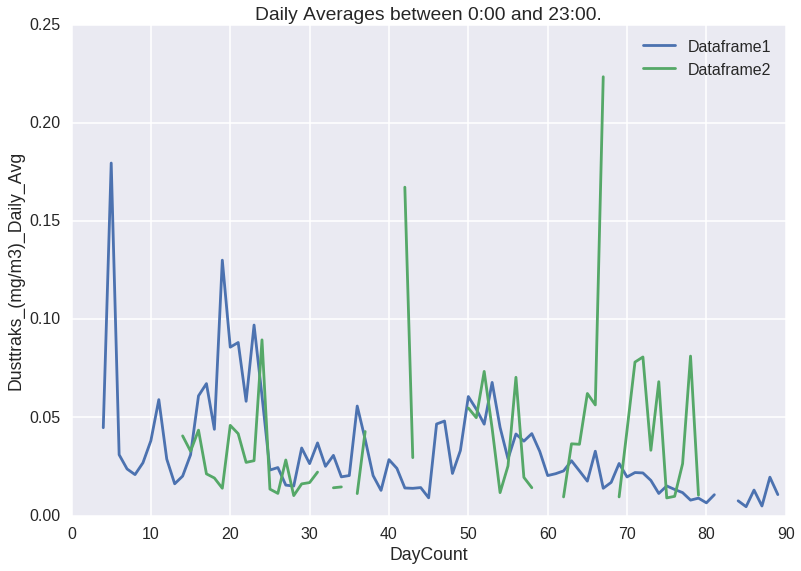

In [188]:
hour_start_slider = IntSlider(min=0, max=23, step=1, value=0)
hour_end_slider = IntSlider(min=0, max=23, step=1, value=23)
@interact(start_hour_interactive = hour_start_slider, end_hour_interactive = hour_end_slider)

def plot_interactive_time_range(start_hour_interactive, end_hour_interactive):
    print('Select values for time of day range cutoff hours.')
    plot_hour_range(hour_range_feature_x,
                       hour_range_feature_y,
                       dataframe1,
                       dataframe2,
                       start_hour_interactive,
                       end_hour_interactive,
                       dataframe1_name,
                       dataframe2_name)
               
               

## Temperature Brackets
Currently assumes Temperature_(degC) column in dataset.

In [189]:
warm_days = widgets.Text(
    description='Minimum average temperature for warm days',
    value= '14.4',
)
warm_days

In [190]:
warm_days_cutoff = float(warm_days.value)

In [191]:
cold_days = widgets.Text(
    description='Minimum average temperature for cold days',
    value= '8.7',
)
cold_days

In [192]:
cold_days_cutoff = float(cold_days.value)

In [193]:
df1_columns = [column for column in dataframe1]
df_feature_diurnal_temperature_range = widgets.Dropdown(
    options= df1_columns,
    description='Choose feature:'
)
display(df_feature_diurnal_temperature_range)

In [194]:
def plot_temp_bracket_diurnal(feature, name, df1, df2, cold_days_cutoff, warm_days_cutoff, df1_name, df2_name):
    hourlist = range(0,24)
    df1cold = dataframe1[(dataframe1['Temperature_(degC)_Daily_Avg']) <= cold_days_cutoff]
    df_dict['df1cold']=df1cold
    df1mid = dataframe1[dataframe1['Temperature_(degC)_Daily_Avg'] > cold_days_cutoff]
    df1mid = df1mid[df1mid['Temperature_(degC)_Daily_Avg'] < warm_days_cutoff]
    df_dict['df1mid']=df1mid
    df1warm = dataframe1[dataframe1['Temperature_(degC)_Daily_Avg'] >= warm_days_cutoff]
    df_dict['df1warm']=df1warm
    df2cold = dataframe2[dataframe2['Temperature_(degC)_Daily_Avg'] <= cold_days_cutoff]
    df_dict['df2cold']=df2cold
    df2mid = dataframe2[dataframe2['Temperature_(degC)_Daily_Avg'] > cold_days_cutoff]
    df2mid = df2mid[df2mid['Temperature_(degC)_Daily_Avg'] < warm_days_cutoff]
    df_dict['df2mid']=df2mid
    df2warm = dataframe2[dataframe2['Temperature_(degC)_Daily_Avg'] >= warm_days_cutoff]
    df_dict['df2warm']=df2warm
    while True:
        try:
            plt.plot(hourlist, feature_diurnal_data(df1cold, name))
            plt.plot(hourlist, feature_diurnal_data(df1mid, name))
            plt.plot(hourlist, feature_diurnal_data(df1warm, name))
            plt.plot(hourlist, feature_diurnal_data(df2cold, name))
            plt.plot(hourlist, feature_diurnal_data(df2mid, name))
            plt.plot(hourlist, feature_diurnal_data(df2warm, name))         

            plt.legend([df1_name + ' Cold', df1_name + ' Mid',
                        df1_name + ' Warm', df2_name + ' Cold',
                        df2_name + ' Mid', df2_name + ' Warm'])
            plt.title(name + ' Diurnal Temperature Brackets')
            plt.xlabel('Hour')
            plt.ylabel(name)
            plt.show()
            break
        except:
            print('Could not plot desired graph. Please try selecting a different feature.')
            return

plot_temp_bracket_diurnal(df_feature_diurnal_temperature_range.value,
                       df_feature_diurnal_temperature_range.value,
                       dataframe1,
                       dataframe2,
                       cold_days_cutoff,
                       warm_days_cutoff,
                       dataframe1_name.value,
                       dataframe2_name.value)

Could not plot desired graph. Please try selecting a different feature.


### Live interactive temperature brackets with cutoffs

In [195]:
cold_cutoff_slider = FloatSlider(min=dataframe1['Temperature_(degC)'].min(), max=dataframe1['Temperature_(degC)'].max(), step=.25, value=8)
warm_cutoff_slider = FloatSlider(min=dataframe1['Temperature_(degC)'].min(), max=dataframe1['Temperature_(degC)'].max(), step=.25, value=15)
@interact(cold_days_interactive_cutoff = cold_cutoff_slider, warm_days_interactive_cutoff = warm_cutoff_slider)

def plot_interactive_temp_bracket_diurnal(cold_days_interactive_cutoff, warm_days_interactive_cutoff):
    print('Select values for temperature bracket cutoff temperatures (degrees Celsius).')
    plot_temp_bracket_diurnal(df_feature_diurnal_temperature_range.value,
                       df_feature_diurnal_temperature_range.value,
                       dataframe1,
                       dataframe2,
                       cold_days_interactive_cutoff,
                       warm_days_interactive_cutoff,
                       dataframe1_name.value,
                       dataframe2_name.value)

               
               
               

Select values for temperature bracket cutoff temperatures (degrees Celsius).
Could not plot desired graph. Please try selecting a different feature.


### Live Interactive Temperature Brackets with Percentiles

In [196]:

cold_percentile_slider = FloatSlider(min = 0.01, max = 1.00, step = .005, value = .25)
warm_percentile_slider = FloatSlider(min = 0.01, max = 1.00, step = .005, value = .75)

@interact(cold_days_interactive_percentile = cold_percentile_slider,
          warm_days_interactive_percentile = warm_percentile_slider,)

def plot_interactive_temp_percentile_diurnal(cold_days_interactive_percentile, warm_days_interactive_percentile):
    cold_cutoff = float(df_merged['Temperature_(degC)'].quantile([cold_days_interactive_percentile]))
    warm_cutoff = float(df_merged['Temperature_(degC)'].quantile([warm_days_interactive_percentile]))
    print('Select values for temperature bracket cutoff percentiles.')
    print('Cold days temperatue cutoff = ' + str(int(cold_cutoff)) +
          ' degrees C. Warm days temperature cutoff = ' + str(int(warm_cutoff)) + ' degrees C.')
    plot_temp_bracket_diurnal(df_feature_diurnal_temperature_range.value,
                       df_feature_diurnal_temperature_range.value,
                       dataframe1,
                       dataframe2,
                       cold_cutoff,
                       warm_cutoff,
                       dataframe1_name.value,
                       dataframe2_name.value)

               

Select values for temperature bracket cutoff percentiles.
Cold days temperatue cutoff = 6 degrees C. Warm days temperature cutoff = 16 degrees C.
Could not plot desired graph. Please try selecting a different feature.


In [197]:
df_list = df_dict.keys()
df_to_export = widgets.Dropdown(
    options= df_list,
    description='Choose a dataframe',
)
display(df_to_export)

In [198]:
csv_to_export_name = widgets.Text(
    description='Filename of Exported CSV:',
    value= 'test.csv',
)
csv_to_export_name

In [199]:
df_dict[df_to_export.value].to_csv(csv_to_export_name.value)